In [1]:
import pandas as pd
import os

In [2]:
topic = 'abortion'
scheme = 'EI'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion/EI'

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1344430216194777090,"FINALMENTE! Argentina Legalizes Abortion, a Mi...",1,Favor,0,Uknown,-1,Against,0,Uknown,2020-12-30 17:48:36
1,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:38:39
2,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,1,Favor,0,Uknown,2020-12-30 17:34:08
3,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,1,Favor,-1,Against,1,Favor,2020-12-30 17:25:53
4,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:24:51


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,1,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,0,#Abortion will never be approved on our soil! ...
2,0,A HUGE victory for #WomensRights as #Argentina...
3,1,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...
4,0,Dems are a death cult. They celebrate abortion...


In [7]:
train.Label.unique()

array([ 1,  0, -1])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([ 1, -1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,2541
1,2410


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,Need a ProLife R.E. Agent? - Support a ProLife...,AGAINST,Legalization of Abortion
1,Where is the childcare program @joanburton whi...,AGAINST,Legalization of Abortion
2,I get several requests with petitions to save ...,AGAINST,Legalization of Abortion
3,"we must always see others as Christ sees us,we...",AGAINST,Legalization of Abortion
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,AGAINST,Legalization of Abortion


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,543
1,167


In [14]:
train.shape, test.shape

((4951, 2), (710, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [19]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

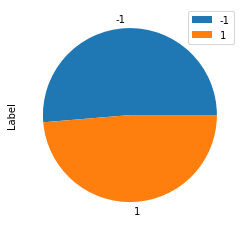

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

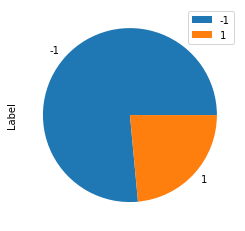

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

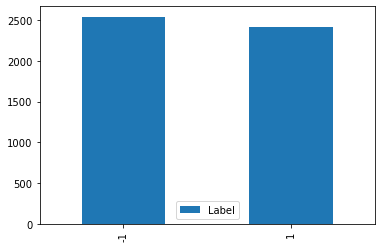

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

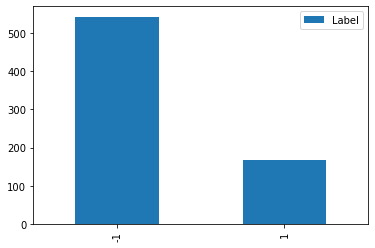

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,1,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,1,USER USER CULTURE OF LIFE for all #Georgians #...
2,1,USER USER covers Preexisting PRO #American #LI...
3,-1,Someone is Missing: British father of aborted ...
4,-1,Don’t let USER and their puppets steal the Sen...
...,...,...
4946,-1,What drives women to have #abortions? URL
4947,-1,Common excuse: I will vote #ProLife on the res...
4948,-1,"I completely stand with Polands abortion ban, ..."
4949,-1,Abby Johnson's full remarks at the GOP Convent...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4951 non-null   int64 
 1   Tweet   4951 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.5+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   710 non-null    int64 
 1   Tweet   710 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4951 entries, 0 to 4950
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4951 non-null   int64 
 1   Tweet   4951 non-null   object
dtypes: int64(1), object(1)
memory usage: 116.0+ KB


# Training

In [31]:
from fastai.text import *

In [32]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.1)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [33]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"# euthanasia # xxmaj martiallaw # xxmaj socialists # xxmaj abortion xxmaj defund # xxup blm xxmaj defend xxup url xxbos xxup user xxup user covers xxmaj xxunk xxup pro # xxmaj american # xxup life for all # xxmaj georgians # xxup georgia # gapol # gasen vs xxmaj xxunk monster # reverendwarnock "" i 'm a # prochoice xxmaj pastor "" xxup culture xxup of xxup url xxbos"
1,end xxup safe # abortions xxmaj anyone who is truly # prolife believes # abortionismurder & & wants to prevent abortion ( rather than using it as a political xxunk ) should read this thread : xxup url xxbos # xxmaj russia # xxmaj abortion # prolife xxmaj xxunk xxmaj orthodox xxmaj church has ‘ xxunk & & xxunk ’ stance on abortion & & does not demand practice be
2,"user xxmaj not one person is pro abortion . xxmaj conservatives on mask xxunk body my choice . "" xxup user hates government xxunk . xxmaj same people are against a women 's right to choose . xxbos xxmaj so what do xxup we xxup want as # women ? xxmaj we call for the bill xxunk 24 weeks time limit of abortion to be accepted & & call for"
3,"xxmaj police violence as anti - gov protesters march in # xxmaj warsaw # xxmaj poland , # xxmaj xxunk # prochoice group pushes xxunk at far right , # xxmaj xxunk looks to # xxmaj xxunk xxunk to deal with # xxunk & & # xxup covid19 , clinics in xxup us close down + xxunk to fund family planning in xxup url xxbos xxup user xxup user xxmaj"
4,"there might be more xxunk of a family ’s right to # healthcare xxmaj because that ’s what it is xxmaj body care is xxup family xxup care xxup url xxbos i like how conservatives xxunk us pro - choicers as “ pro - abortion ” instead , because obviously all of us want women to get abortions ? xxmaj this is ignorant and further xxunk fear xxunk tactics ."


In [34]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [35]:
data_clas.show_batch()

text,target
"xxbos xxup can xxup yall xxup stfu xxup worrying xxup about a xxup xxunk xxup body ? ? ? xxup yall xxup get xxup mad xxup when xxup yall xxup taxes xxup go , xxup because xxup the xxup same xxup girl / xxup woman xxup who xxup wanted a xxup abortion xxup is xxup now xxup on xxup food xxup xxunk xxup to xxup supply xxup for xxup the",1
"xxbos xxup user xxup user xxup lol xxup have u xxup done xxup any xxup xxunk xxup on xxup abortion ? ! ? ! ? ? ! xxup its xxup not a xxup baby xxup yet , xxup its a xxup clump xxup of xxup cells . xxup and xxup who xxup are xxup you xxup to xxup tell a xxup woman xxup what xxup to xxup do xxup with",1
"xxbos xxup user xxmaj how in the xxmaj world can you be a xxmaj catholic and yet xxunk that xxmaj abortion is xxup ok ? ? ? xxup it xxup 's xxup murder xxup joe , xxup murder xxrep 4 ! xxup you xxup are xxup supporting xxup and xxup xxunk xxup the xxup killing xxup of xxup the xxup most xxup innocent xxup among xxup us xxrep 4 .",-1
xxbos xxup user xxmaj biden : # xxunk xxmaj trump : # xxmaj xxunk xxmaj biden : # prochoice xxmaj trump : xxmaj biden : # xxunk xxmaj trump : xxmaj biden : # xxmaj safety xxmaj trump : # xxunk xxmaj biden : # xxunk xxmaj trump : ? xxmaj biden : # xxunk xxmaj trump : # xxmaj xxunk # xxmaj biden : # xxunk xxmaj trump :,1
xxbos i have news for you # xxunk xxrep 4 . # women still try to hurt themselves after they have made & & been thru the horrific act of # abortion . xxup don't xxup judge xxup until xxup you xxup have xxup done xxup one xxup of xxup your xxup polls xxup on xxup women xxup who xxup have xxup been # xxup prochoice & & xxup xxunk,1


In [36]:
f'data_clas_{topic}_{scheme}'

'data_clas_abortion_EI'

In [37]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [38]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '.'],
 3544)

In [39]:
#f'{pathNN}/spanish-model/lm-spanish-weights-2'

In [40]:
#pretrained_model = (f'{pathNN}/spanish-model/lm-spanish-weights-2', f'{pathNN}/spanish-model/spanish-itos-pickle')

In [41]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 5.25E-02


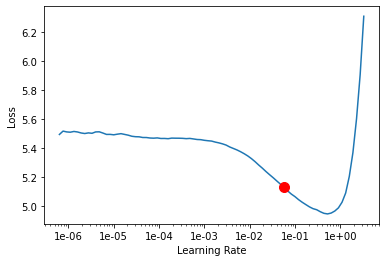

In [42]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [43]:
learn_lm.fit_one_cycle(10,5e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.335349,3.974540,0.267634,00:11
1,4.497875,4.712771,0.213036,00:11
2,5.290288,5.617218,0.157946,00:11
3,5.675498,5.076293,0.204911,00:11
4,5.521517,4.871802,0.219375,00:11
5,5.278315,4.586397,0.234509,00:11
6,5.009537,4.417054,0.239464,00:11
7,4.672420,4.213334,0.250089,00:11
8,4.389211,4.108590,0.256964,00:11
9,4.167040,4.081634,0.259643,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 9.12E-04


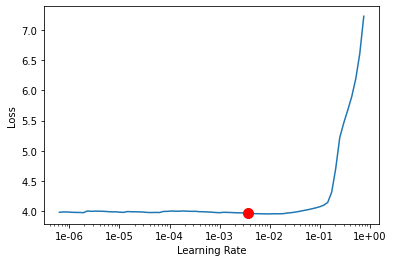

In [44]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [45]:
learn_lm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.940703,4.027328,0.265223,00:16
1,3.865140,3.968683,0.271563,00:16
2,3.788949,3.942001,0.275848,00:16
3,3.723064,3.929053,0.276786,00:16
4,3.683270,3.926655,0.277232,00:16


In [46]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [47]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [48]:
learn_lm.save(f'{topic}_model_v1')

In [49]:
learn_lm.load(f'{topic}_model_v1');

In [50]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [51]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [52]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [53]:
learn.save('learner-1stage')

In [54]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-03
Min loss divided by 10: 6.31E-04


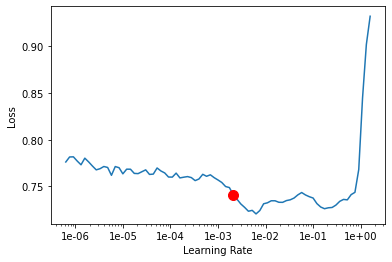

In [55]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [56]:
learn.fit_one_cycle(10,1e-3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.682524,0.644320,0.589086,00:09
1,0.644107,0.617422,0.622531,00:10
2,0.600821,0.651159,0.596805,00:10
3,0.601176,0.674184,0.591261,00:09
4,0.593436,0.699027,0.562919,00:09
5,0.584027,0.677117,0.599599,00:10
6,0.597583,0.671625,0.585600,00:11
7,0.574771,0.634877,0.640039,00:10
8,0.572632,0.683375,0.599959,00:11
9,0.575338,0.683572,0.601919,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [57]:
learn.save('learner-2stage')

In [58]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


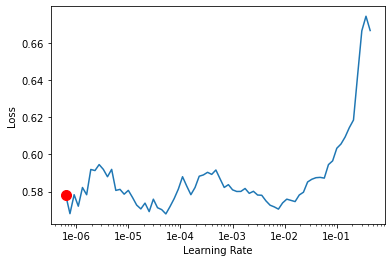

In [59]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [91]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.555934,0.646542,0.579969,00:10
1,0.566585,0.711804,0.549695,00:10
2,0.562914,0.815656,0.463431,00:10
3,0.539461,0.710421,0.549990,00:10
4,0.526255,0.709136,0.559838,00:10


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [92]:
learn.save('learner-3stage')

In [93]:
learn.load('learner-3stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 9.12E-08


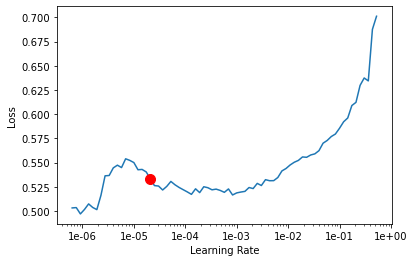

In [94]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [95]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.545096,0.627086,0.617268,00:10
1,0.557446,0.606126,0.624016,00:09
2,0.548171,0.604831,0.625607,00:09
3,0.533450,0.649295,0.608742,00:09
4,0.528238,0.665912,0.597694,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.74E-04


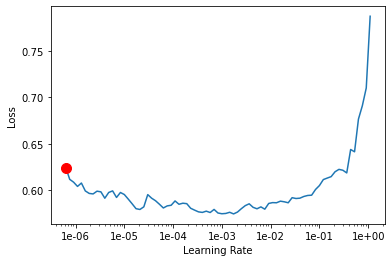

In [60]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [61]:
learn.fit_one_cycle(5,1e-7,moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time
0,0.577153,0.654423,0.621472,00:12
1,0.581025,0.654228,0.629840,00:12
2,0.586434,0.701483,0.586603,00:12
3,0.568914,0.651805,0.629787,00:12
4,0.585588,0.676258,0.610876,00:13


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [63]:
learn.save('learner-stage-freeze-2')

In [64]:
learn.save('learner-stage-freeze-2')

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.74E-04


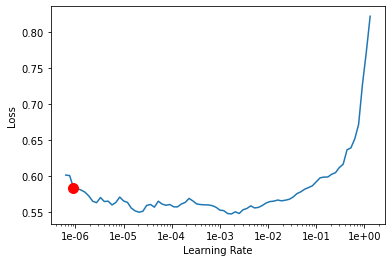

In [65]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [66]:
learn.fit_one_cycle(3,1e-6, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.581850,0.663697,0.621702,00:19
1,0.586753,0.659294,0.623206,00:21
2,0.577738,0.675434,0.604153,00:20


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [67]:
learn.save('learner-stage-freeze-3')

In [69]:
learn.load('learner-stage-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


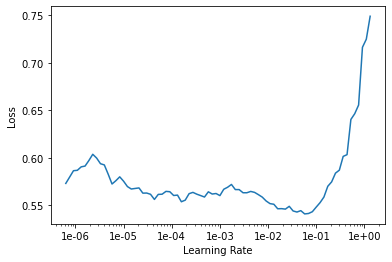

In [70]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [75]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.278011,0.802402,0.604070,00:26
1,0.281216,0.584107,0.683569,00:28
2,0.246081,0.653128,0.667815,00:28


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [76]:
learn.save('learner-stage-unfreeze-68')

In [78]:
learn.load('learner-stage-unfreeze-68');

In [79]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

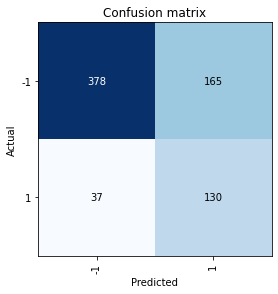

In [80]:
interp.plot_confusion_matrix()

In [81]:
preds

tensor([[9.9992e-01, 8.3740e-05],
        [5.8968e-01, 4.1032e-01],
        [9.4668e-01, 5.3316e-02],
        ...,
        [4.8679e-01, 5.1321e-01],
        [1.2000e-01, 8.8000e-01],
        [7.7300e-01, 2.2700e-01]])

In [82]:
learn.save('learner-final')